In [3]:
%pylab inline
%load_ext autoreload
%autoreload 2
from toolbox.scraping.table_scrapers import scrape_tables
from toolbox.sequence_generation.markov import MarkovSeqGen
import pandas as pd

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


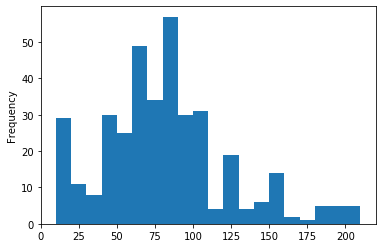

In [6]:
def to_type(x,type_):
    try:
        cast = type_(x)
        return cast
    except:
        return None

moves = scrape_tables('https://bulbapedia.bulbagarden.net/wiki/List_of_moves')[1]

moves.PP = moves.PP.apply(lambda x: to_type(x,int))

moves.Power = moves.Power.apply(lambda x: to_type(x,int))

moves.Power.plot.hist(bins=20)

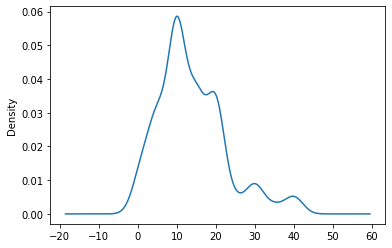

In [7]:
moves.PP.plot.kde()

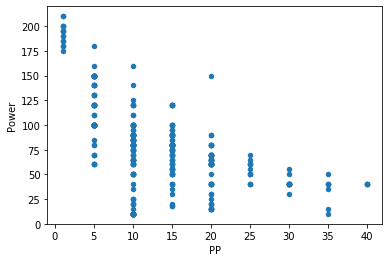

In [8]:
moves.plot.scatter('PP','Power')

In [9]:
moves.dropna().sample(4)[['Name', 'Type', 'Category', 'Contest', 'PP', 'Power', 'Accuracy']]

,Name,Type,Category,Contest,PP,Power,Accuracy
417,Bullet Punch,Steel,Physical,Tough,30.0,40.0,100%
344,Magical Leaf,Grass,Special,Beautiful,20.0,60.0,—
526,Electroweb,Electric,Special,Beautiful,15.0,55.0,95%
171,Flame Wheel,Fire,Physical,Beautiful,25.0,60.0,100%


In [10]:
dfs = scrape_tables('https://bulbapedia.bulbagarden.net/wiki/List_of_Pok%C3%A9mon_by_National_Pok%C3%A9dex_number')

In [11]:
names = pd.concat(dfs[:-1], axis=0)['Pokémon'].drop_duplicates().reset_index(drop=True).dropna()

In [12]:
names

1       Bulbasaur
2         Ivysaur
3        Venusaur
4      Charmander
5      Charmeleon
          ...    
886      Drakloak
887     Dragapult
888        Zacian
889     Zamazenta
890     Eternatus
Name: Pokémon, Length: 890, dtype: object

In [17]:
gen = MarkovSeqGen(names)
gen.gen(1)

890it [00:00, 112631.04it/s]


['Ex']

In [19]:
class Pokemon:
    def __init__(self):
        self.catch_rate = random.random()
        self.name = self.gen_name()
        self.moves = moves.dropna().sample(4)[['Name', 'Type', 'Category', 'Contest', 'PP', 'Power', 'Accuracy']]
        
    def __repr__(self):
        return self.name
    
    def gen_name(self, generator = gen):
        return generator.gen(1)[0]+'mon'

In [24]:
team = [Pokemon() for _ in range(6)]

In [25]:
team

[Pitwndmon,
 Exmon,
 Besmon,
 Zyecaranearaneririndendyruichmon,
 Crilekitadirymon,
 Grinkeenemon]

In [27]:
team[0].moves

,Name,Type,Category,Contest,PP,Power,Accuracy
15,Gust*,Flying,Special,Clever,35.0,40.0,100%
758,Max Lightning,Electric,Physical,???,10.0,10.0,—
423,Fire Fang,Fire,Physical,Cool,15.0,65.0,95%
428,Mirror Shot,Steel,Special,Beautiful,10.0,65.0,85%
